In [83]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [63]:
def _unused_columns(data: DataFrame, keep=['open','high','low','close']):
    columns_in_data = list(
        map(lambda t: t.lower(), list(data)))
    columns_to_keep = list(map(lambda t: t.lower(), keep))
    return list(set(columns_in_data) - set(columns_to_keep))

def _drop_unused_columns(data, keep=['open','high','low','close']):
    cols_to_drop = _unused_columns(data, keep)

    def find_col_name(name):
        col_list = list(data)
        try:
            return col_list[next(
                i for i, v in enumerate(col_list) if v.lower() == name)]
        except:
            return ''

    for column_to_drop in cols_to_drop:
        data = data.drop(find_col_name(column_to_drop), axis=1)
    return data

def _fix_datetime_index(data: DataFrame, date_column='Date_Time', add_time=True, keep=['open','high','low','close']):
    """Set the index in the proper `datetime` type """
    format="%Y-%m-%d %H:%M:%S"
    if isinstance(data.index, pd.core.indexes.datetimes.DatetimeIndex):
        return data
    if add_time is True:
        data["Datetime"] = pd.to_datetime(data[date_column] + " 00:00:00",
                                          format=format)
    else:
        data["Datetime"] = pd.to_datetime(data[date_column], format=format)        
    data = data.set_index(pd.DatetimeIndex(data["Datetime"]))
    data = _drop_unused_columns(data, keep)
    return data

In [68]:
dist = "/Volumes/GoogleDrive/My Drive/FOREX/distancias_EURUSD.csv"
ohlc = "/Volumes/GoogleDrive/My Drive/FOREX/EURUSD_OHLC_1Day.csv"
c = pd.read_csv(ohlc)
d = pd.read_csv(dist, header=None)
d.columns=['dt','date', 'd1','d2','d3','d4']

c = _fix_datetime_index(c)
d = _fix_datetime_index(d, add_time=False, date_column='date', keep=['dt', 'd1','d2','d3','d4'])

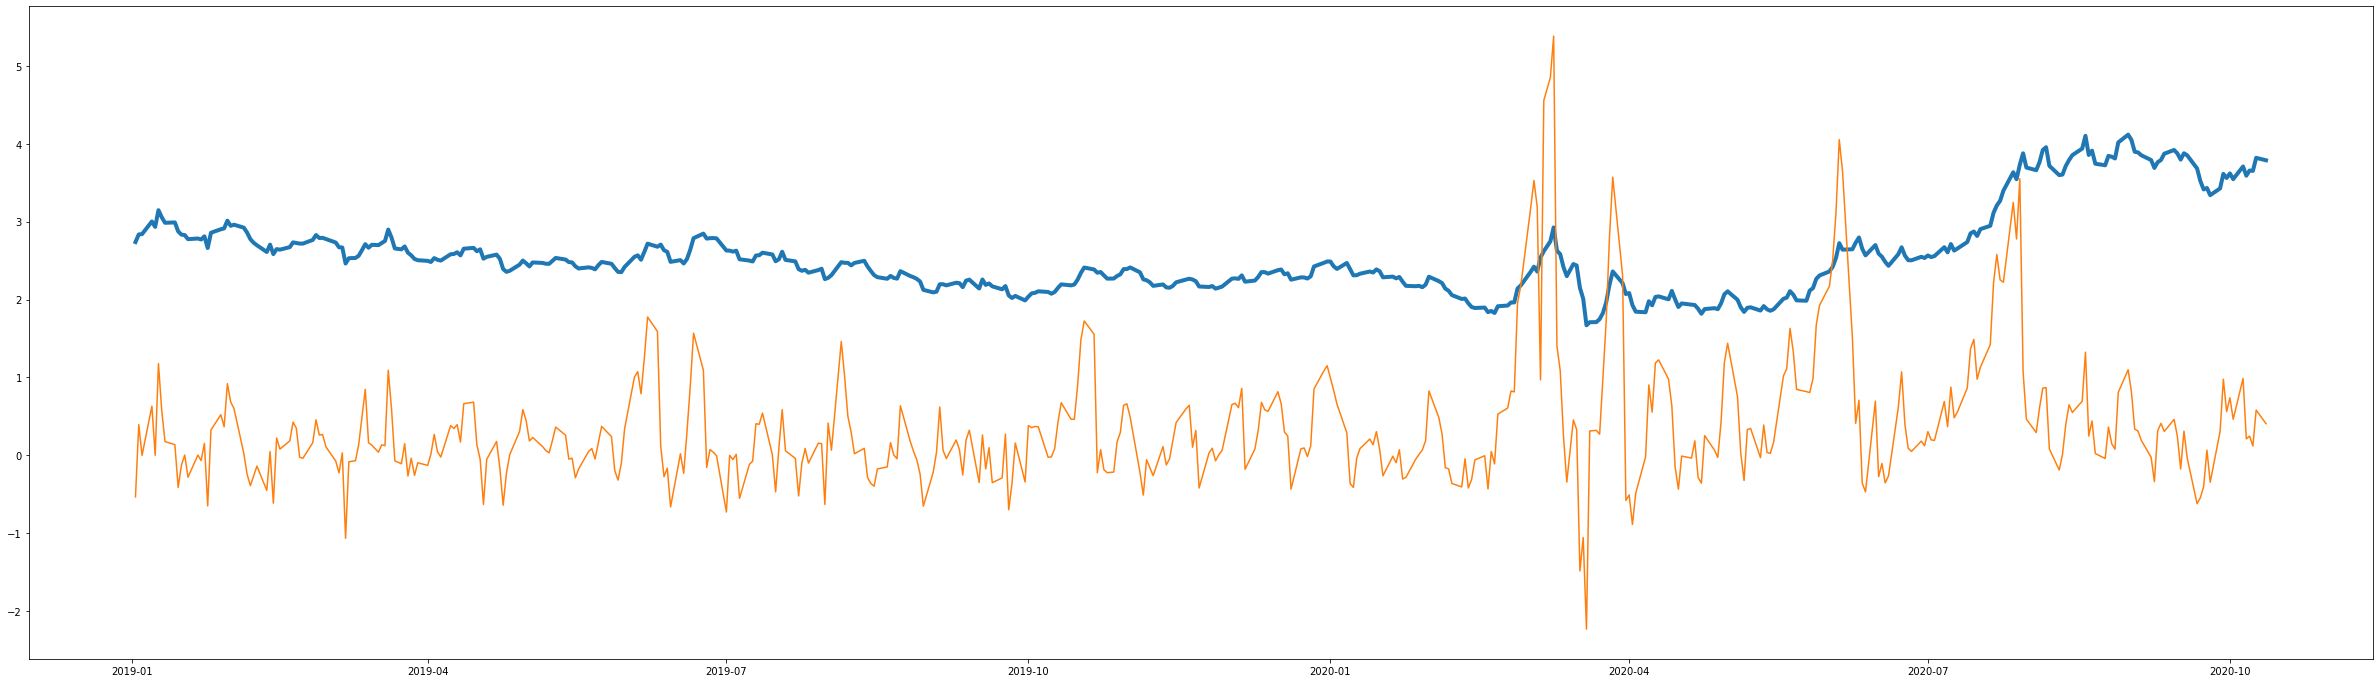

In [96]:
plt.figure(figsize=(42,12))
plt.plot(np.power(c[c.index > "2019-01-01"].close, 8), linewidth=4)
plt.plot(d[(d.index > "2019-01-01") & (d.dt == 10)].d1)
plt.show()